In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import skimage
from skimage.filters import gaussian
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks"]).decode("utf8"))
%matplotlib inline
# Any results you write to the current directory are saved as output.
stage1_train_labels = pd.read_csv('/media/windows-share/Kaggle/stage1_train_labels.csv')
stage1_train_labels.loc[201,'ImageId']

'0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed'

58922
(256, 320, 3)
White
White
White
Red


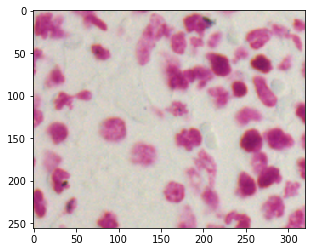

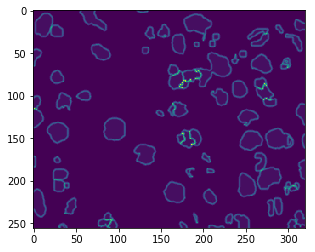

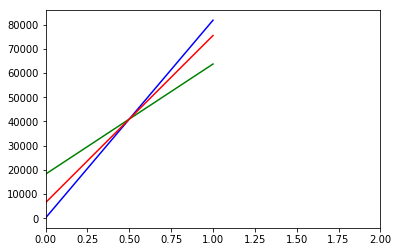

In [36]:
class image():
    def __init__(self, img_code, stage='stage1'):
        self.stage = stage
        self.img_code = img_code
        self.file_path = '/media/windows-share/Kaggle/' + stage + '_train/' + img_code
        self.images_path = self.file_path + '/images'
        self.mask_path = self.file_path + '/masks'
        
        self.img = cv2.imread(self.images_path + '/' + self.img_code + '.png')
        self._mask_file_names = self.get_mask_file_names()
        self.n_nuclei = len(self._mask_file_names)
        self.masks = self.get_masks()
        self.mask = np.sum(self.masks,axis=0)
        self.mask_with_outline = self.combine_masks_with_outline()
        print(self.img.shape)
        
    def get_mask_file_names(self):
        file_names_string = check_output(["ls", "/media/windows-share/Kaggle/" + self.stage + "_train/" + self.img_code + "/masks"]).decode("utf8")
        mask_file_names = file_names_string.split('\n')
        return [mask_file_name for mask_file_name in mask_file_names if len(mask_file_name) > 0]
    
    def get_masks(self):
        masks = []
        for mask_file_name in self._mask_file_names:
            mask = cv2.imread(self.mask_path+'/'+mask_file_name, cv2.IMREAD_GRAYSCALE)
            masks += [(mask > 0).astype(int)]
        return masks
    
    def combine_masks_with_outline(self):
        combined = self.mask.copy()
        for mask in self.masks:
            outline = (np.abs((gaussian(mask,sigma=1,preserve_range=True) - mask))*20).astype(int)
            combined += outline
        return combined
    
    def show_histogram(self):
        color = ('b','g','r')
        hists = []
        for i,col in enumerate(color):
            histr = cv2.calcHist([self.img],[i],None,[2],[0,256])
            hists.append(histr)
            if(histr[0] > histr[1]):
                print('Black')
            else:
                print('White')
            plt.plot(histr,color = col)
            plt.xlim([0,2])
        if(hists[0][0] == hists[2][0]):
            print('Gray')
        else:
            print('Red')
        plt.show()

print(stage1_train_labels.size)
im1 = image(stage1_train_labels.loc[200,'ImageId'])
#14500
plt.imshow(im1.img)
plt.figure()
plt.imshow(im1.mask_with_outline)
im1.n_nuclei
plt.figure()
im1.show_histogram()